In [2]:
import cv2
cv2.__version__

'4.7.0'

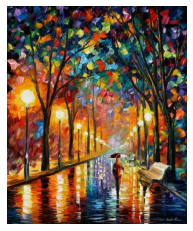

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#import image
img = cv2.imread('/imagesimage.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to RGB
plt.axis('off')
plt.imshow(img)

(-0.5, 593.5, 719.5, -0.5)

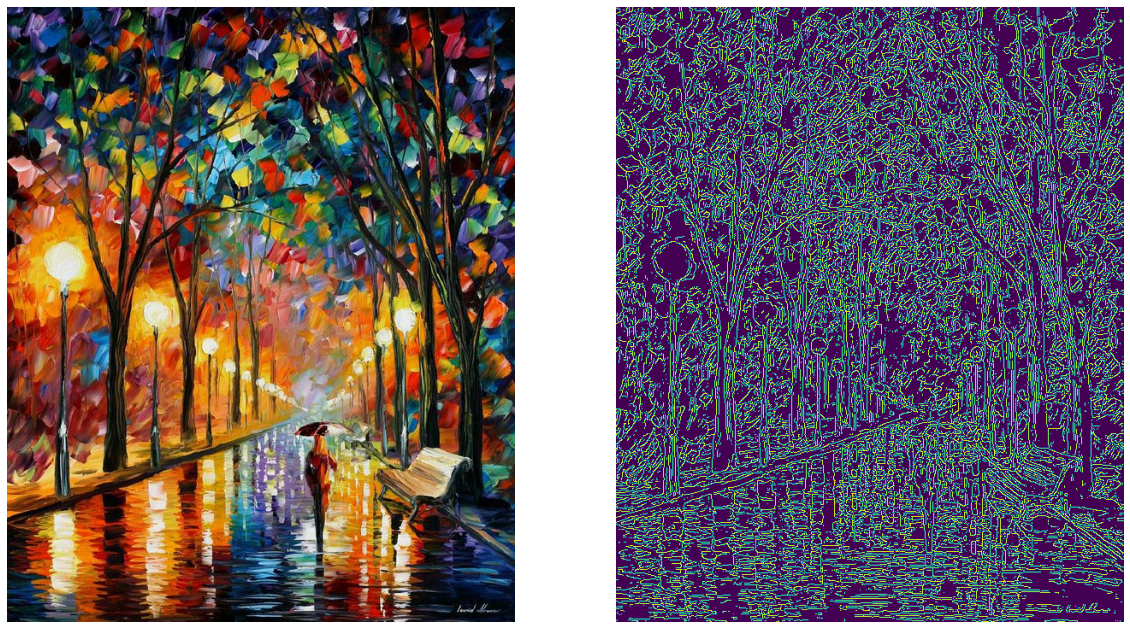

In [4]:
# Canny Detection - a type of edge detection, one of the most popular algorithms for detecting edges
# Performed in 4 steps:
# 1. Noise reduction (via blurring)
# 2. Finding gradient and its direction
# Non-maximum suppression - check every pixel for if it is a local maximum in its surrounding points. If its not, this point is suppressed to 0 but if it is then it moves on to the next stage
# Hysteris thresholding - last decision stage to decide thresholding. Checks intensity gradient against thresholds to determine if edge

edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edges)
plt.axis('off')

(-0.5, 2975.5, 3967.5, -0.5)

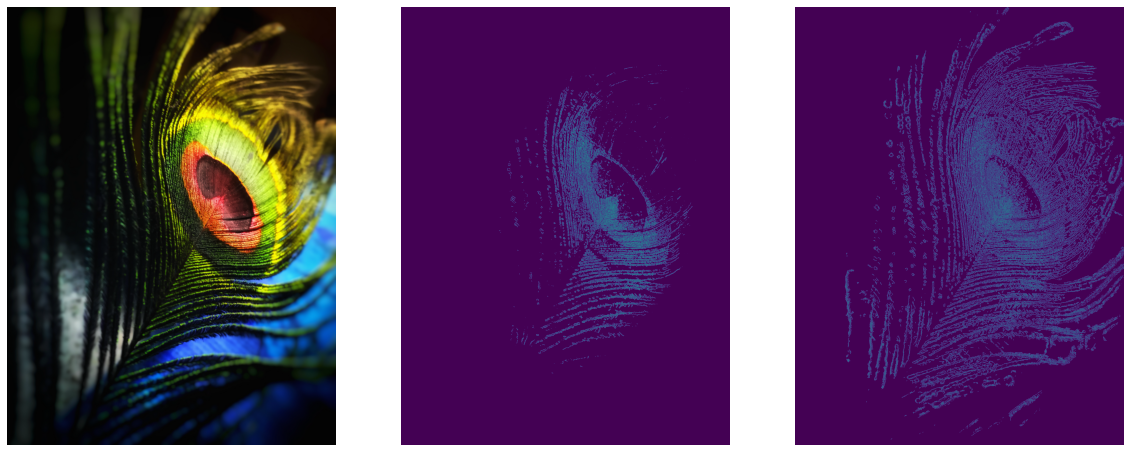

In [5]:
img = cv2.imread('/imagesimage2.jpeg')
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

# testing techniques in next cell on image2
med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))
img_blur = cv2.blur(img, ksize=(5,5))
edges_with_blurring = cv2.Canny(img_blur, threshold1=lower, threshold2=upper)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img)

plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(edges)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges_with_blurring) # big improvement
plt.axis('off')


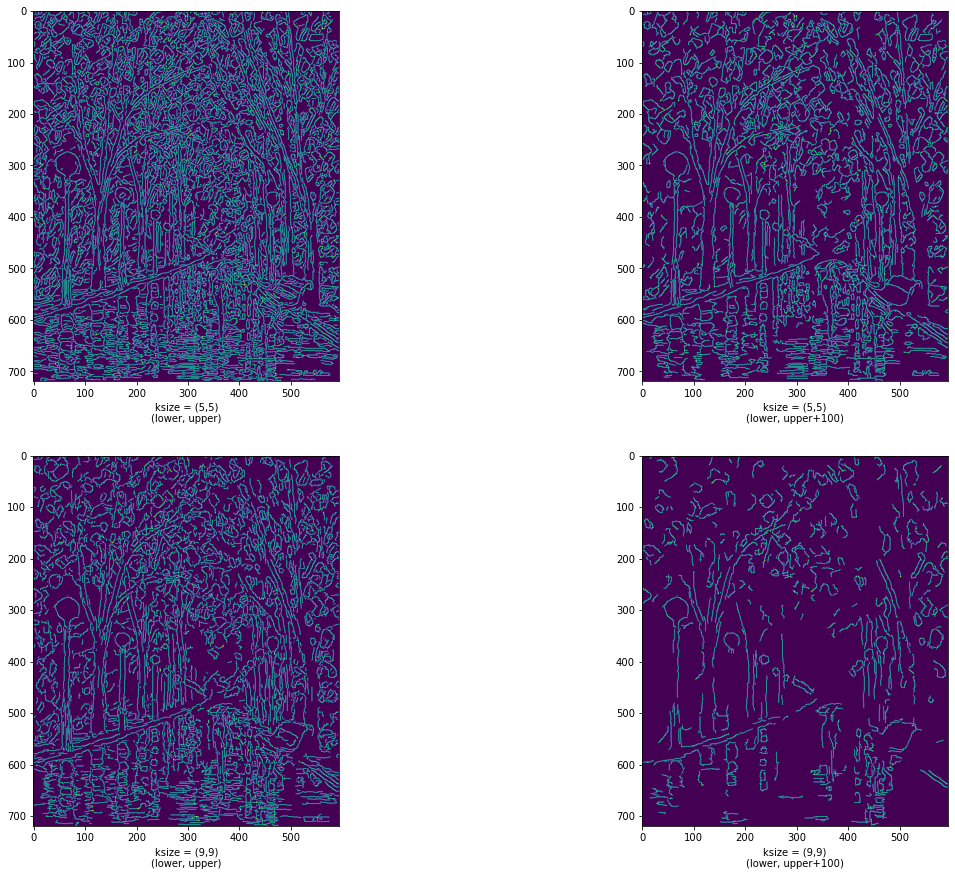

In [6]:
img = cv2.imread('/imagesimage.jpeg')
# adding blurring to improve performance
med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))

# blurring with ksize = 5
img_k5 = cv2.blur(img, ksize=(5,5))

# Canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, threshold1=lower, threshold2=upper)
edges_k5_2 = cv2.Canny(img_k5, threshold1=upper, threshold2=upper+100)

# Blurring with ksize = 9
img_k9 = cv2.blur(img, ksize=(9,9))

edges_k9 = cv2.Canny(img_k9, lower, upper)
edges_k9_2 = cv2.Canny(img_k9, lower, upper+100)

# Plot the images
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
image_names = ['ksize = (5,5)\n(lower, upper)', 'ksize = (5,5)\n(lower, upper+100)', 'ksize = (9,9)\n(lower, upper)', 'ksize = (9,9)\n(lower, upper+100)']
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2,2,i+1).set_xlabel(image_names[i])
    plt.imshow(images[i])
plt.show()
# ksize = (5,5) with no addition to threshold has best results. Blurring makes a big difference

(-0.5, 999.5, 1499.5, -0.5)

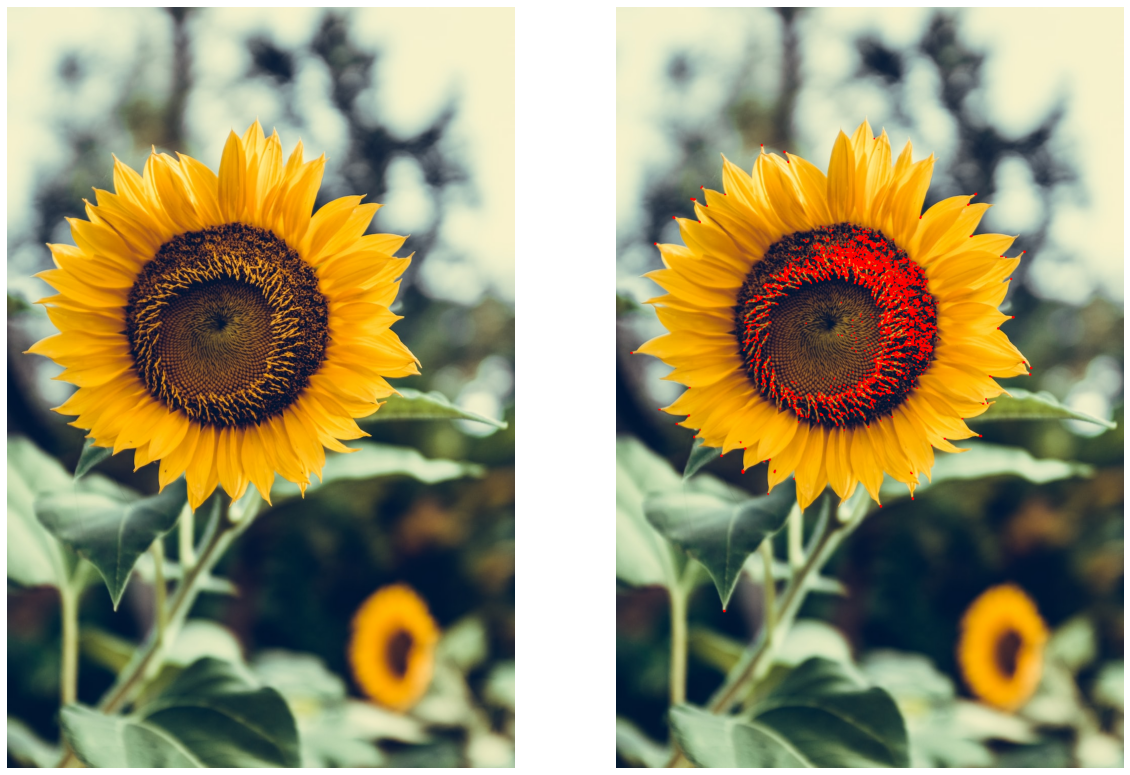

In [7]:
# Corner detection - used in object detention, motion detection, video tracking
# Harris corner detection and Shi & Tomasi corner detection - detect points where there's a considereable change in their intensity values. Construct a matrix, extract eigenvalues to determine if point is corner or not

# Harris corner detection
img = cv2.imread('/imagesimage3.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# The parameter blockSize is the size of the window to consider as neighborhood and k is Harris detector free parameter
# The result is the score R which is used  to detect corners.
dst = cv2.cornerHarris(img_gray, blockSize=2, ksize=3,k=0.04) # blockSize is the size of window to consider
dst = cv2.dilate(dst, None) # detects corners without this line, but dilation is needed to visually verify corner detection
# spot the detected corners
img_2 = img.copy()
img_2[dst>0.01*dst.max()]=[255,0,0]

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

(-0.5, 999.5, 1499.5, -0.5)

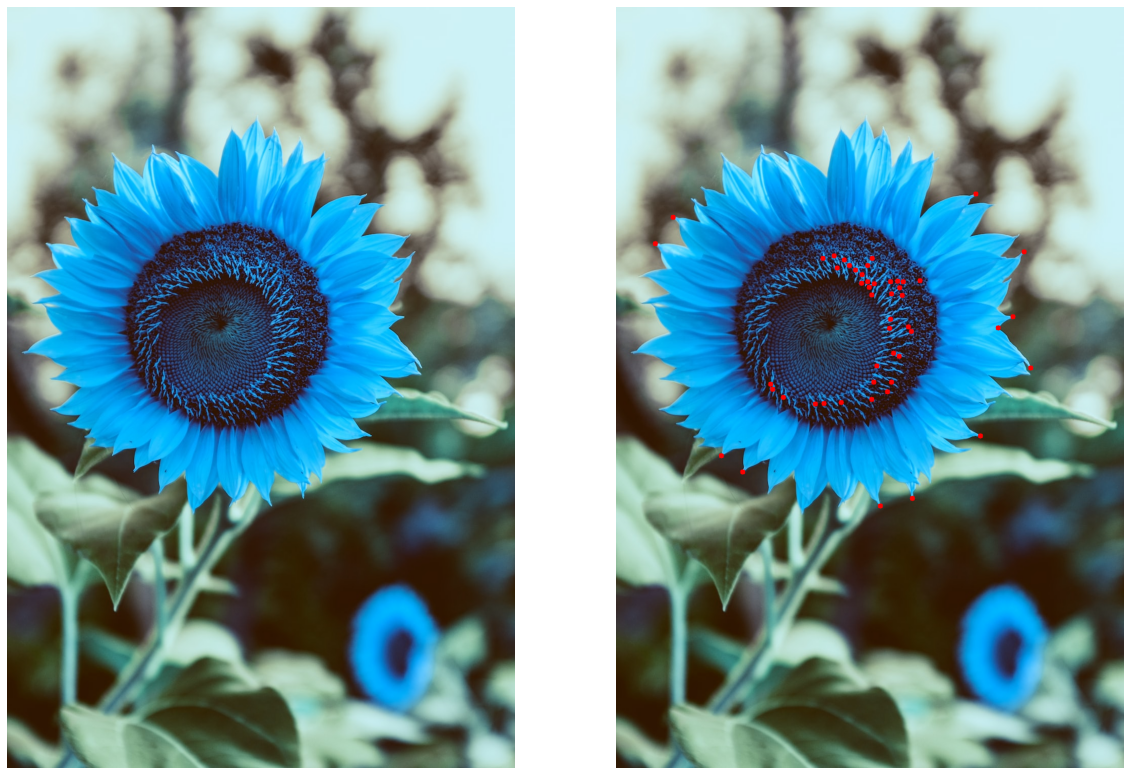

In [8]:
# Shi-Tomasi corner detection
img = cv2.imread('/imagesimage3.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners=50, qualityLevel=0.01, minDistance=10)
# customizable parameters to increase controll
corners = np.int0(corners)

# Spot the detected corners
img_2 = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center=(x,y), radius=5, color=255, thickness=-1)

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')
# only creates circles at 50 corners. how does it rank them?

(-0.5, 449.5, 349.5, -0.5)

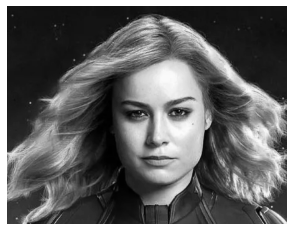

In [9]:
# Face Detection - identifies presence of human faces. Different from face recognition - which detects the distinct identity of a face
# face detection is a classification task that indicates whether or not the target object is there

# Haar feature-based cascade classifier - pretrained face detection model in openCV
# 4 essentials to understanding this algorithm: haar features extraction, integral image, adaboost, and cascade classifiers

# Haar-life features are image filters or kernels used in object detection.
# during detection, the window is passed on a image and a convulational operation with the filers is done to see if the feature is present
# large computation because set of operations are repeated on every part of the image
# integral image - a way of image representation that makes feature evaluation faster and more effective - solves computation cost

# cascade classifier - also makes detection faster
# performs basic operations at early stages of each part of image and employs more complex ones at promising regions
# any part of the image that is not classified as 'face-like' does not go to the next stage
# allows for much higher speed

# implementing cascade classifier
cap_mavl = cv2.imread('/imagescaptain_marvel.jpeg')
roi = cap_mavl[0:350, 100:550]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(roi, cmap = 'gray')
plt.axis('off')


In [10]:
# load cascade filter
# haarcascade must be downloaded - https://github.com/jjone36/vision_4_beginners/tree/master/haarcascades
# has a bunch of different files for each section of the body
face_cascade = cv2.CascadeClassifier('/Users/devaggarwal/Downloads/vision_4_beginners-master/haarcascades/haarcascade_frontalface_default.xml')


In [11]:
# Create the face detecting function

def detect_face(img):
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, scaleFactor = 1.1,minNeighbors = 3)
    for(x, y, w, h) in face_rects:
        cv2.rectangle(img_2, (x,y), (x+w, y+h), (255,255,255), 3)
    
    return img_2

(-0.5, 449.5, 349.5, -0.5)

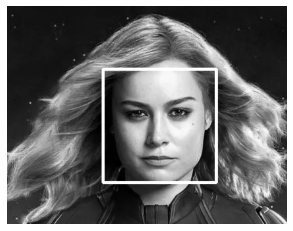

In [12]:
roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap='gray')
plt.axis('off')

(-0.5, 1136.5, 381.5, -0.5)

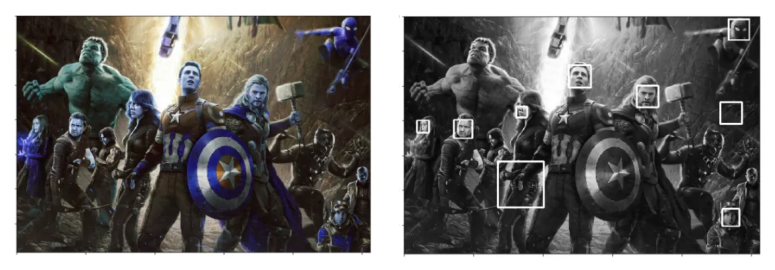

In [13]:
avengers = cv2.imread('/imagesavengers.jpeg')
avengers_copy = avengers.copy()
avengers_copy = cv2.cvtColor(avengers_copy, cv2.COLOR_BGR2GRAY)

avengers_detected = detect_face(avengers_copy)
plt.figure(figsize=(30,30))
plt.subplot(1,2,1); plt.imshow(avengers)
plt.axis('off')


In [14]:
# Runs program on separate window using webcam, draws rectangles for every frame and then sends them to screen
# IT WORKS BUT THERE ARE PROBLEMS WITH EXITING THE WINDOW
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()